import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import os  

Load Data

In [43]:
os.listdir('/content/titanic')

['test (3).csv', 'train (3).csv', 'gender_submission (2).csv']

In [44]:
train=pd.read_csv('/content/titanic/train (3).csv')
test=pd.read_csv('/content/titanic/test (3).csv')

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)


train.head()

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [47]:
df = train
mis_val = df.isnull().sum()

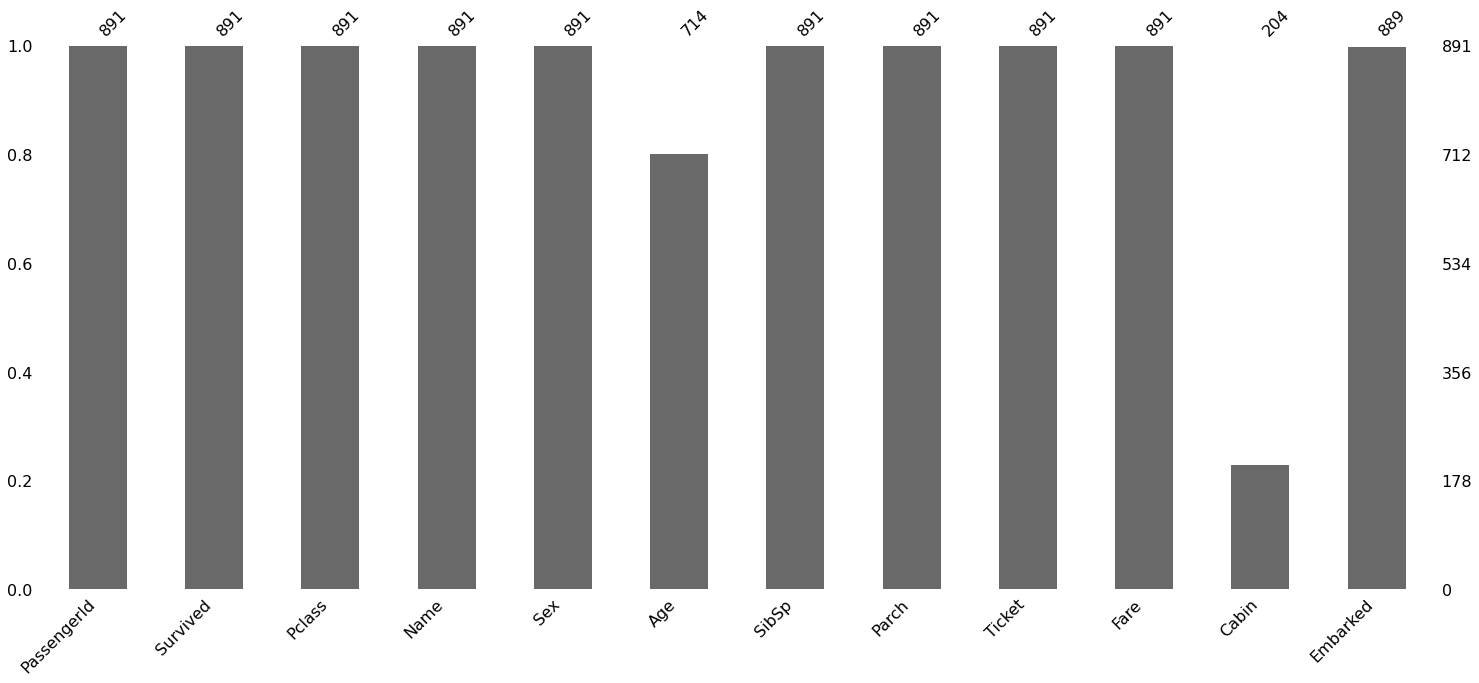

In [49]:
import missingno as msno
msno.bar(train)

it is clear that age , cabin and embarked has missing values

---



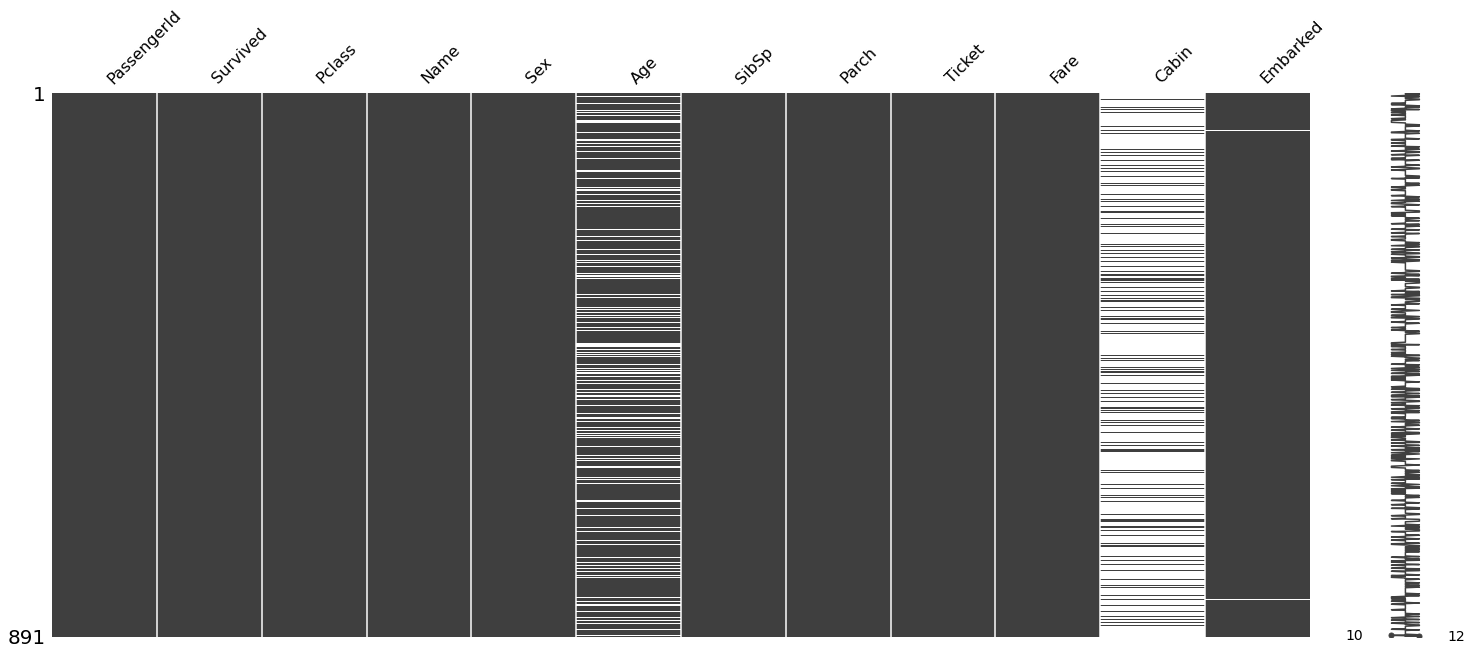

In [50]:
msno.matrix(train)

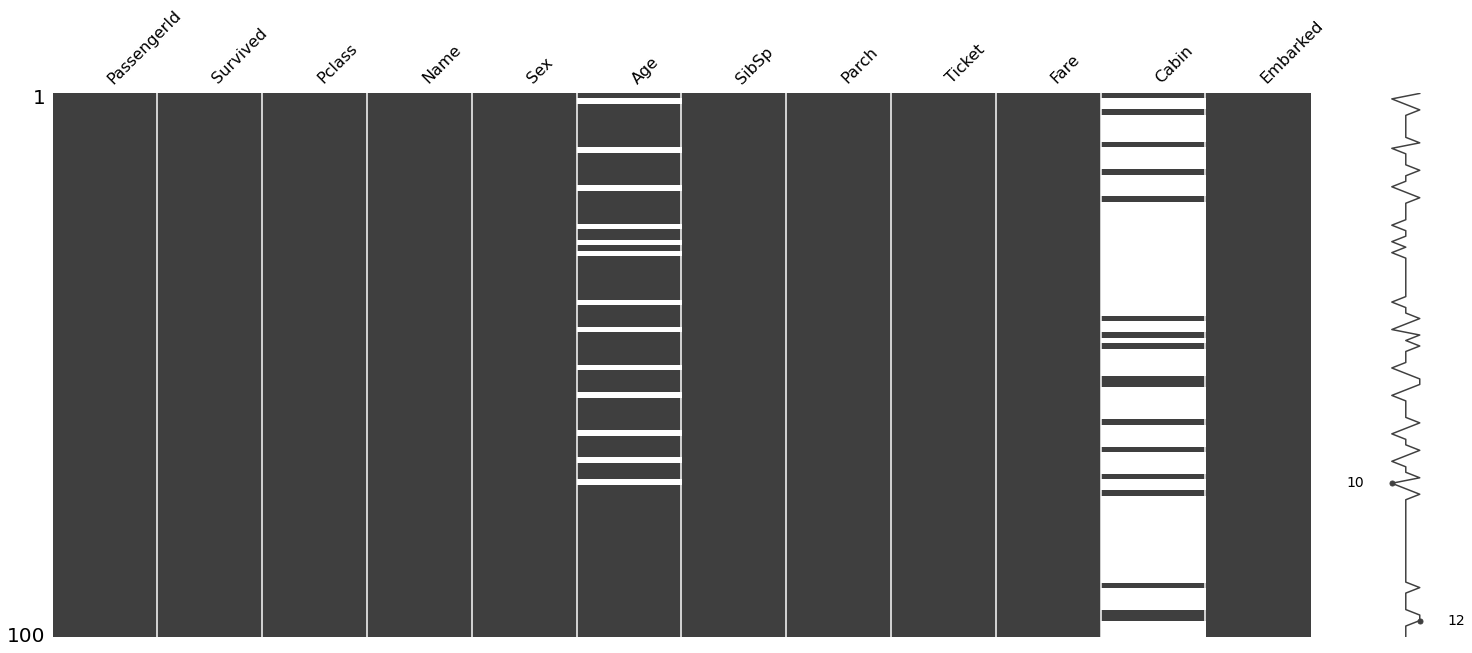

In [51]:
msno.matrix(train.sample(100))

there can be 3 reasons for missing values. MCAR, MAR, NMAR

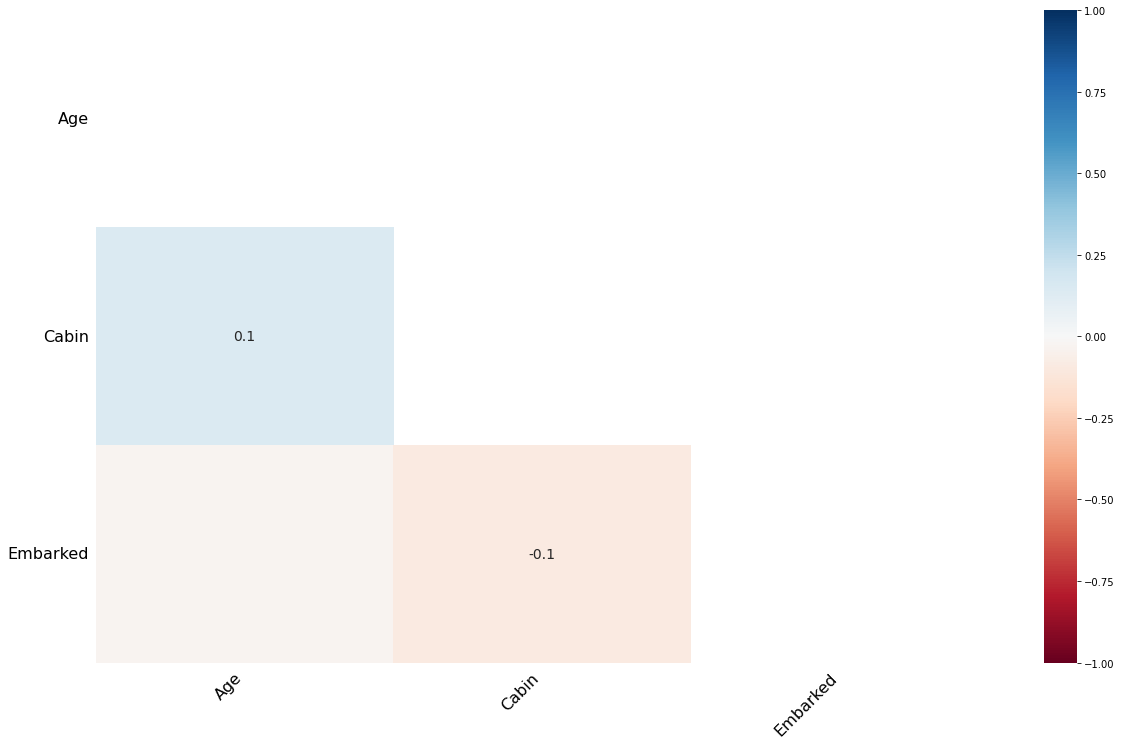

In [52]:
msno.heatmap(train)

low correlation means data is missing at random!

In [53]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

finding the mean of Age 

In [54]:
train = train.copy()
train['Age'].mean() 

29.69911764705882

imputing using constant value, saying strategy=constant

In [55]:
from sklearn.impute import SimpleImputer
train_constant = train.copy()
mean_imputer = SimpleImputer(strategy='constant') 
train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
train_constant.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Since my data has non numeric values i am going with most frequent as my strategy

In [57]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
mean_imputer = SimpleImputer(strategy='most_frequent') 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

In [58]:
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Multivariate feature imputation - Multivariate imputation by chained equations (MICE)


In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

In [60]:
train_mice['Age'].isnull().sum()

0